In [59]:
import pandas as pd
import numpy as np

import os
import shutil

from PIL import Image

In [60]:
df = pd.read_csv('../2_SeparatingMaleDataset/maleDS.csv')
df.head()

,id,articleType,usage
0,15970,Shirts,Casual
1,39386,Jeans,Casual
2,21379,Track Pants,Casual
3,53759,Tshirts,Casual
4,1855,Tshirts,Casual


In [61]:
df.shape

(25080, 3)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25080 entries, 0 to 25079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           25080 non-null  int64 
 1   articleType  25080 non-null  object
 2   usage        25080 non-null  object
dtypes: int64(1), object(2)
memory usage: 587.9+ KB


# Preprocessing

### Dealing with black and white images (80x60)

In [63]:
defectedImagesIDs = [] # 80x60 images
goodImagesIDs = [] # 80x60x3 images
folderPathOfImage = '../2_SeparatingMaleDataset/maleDS/'

for id in df['id']:
    imagePathVariable = folderPathOfImage + str(id)+'.jpg'
    image = Image.open(imagePathVariable)
    numpyArrayImg = np.array(image)
        
    a = (numpyArrayImg.shape)  
    if a == (80, 60, 3):
        goodImagesIDs.append(id)
    else:
        defectedImagesIDs.append(id)

In [64]:
print(len(goodImagesIDs))
print(len(defectedImagesIDs))
print(len(goodImagesIDs) + len(defectedImagesIDs))

24781
299
25080


In [65]:
defectedImgs = df[df['id'].isin(defectedImagesIDs)]
defectedImgs.shape
defectedImgs['usage'].value_counts() 
# only 31 bad (80x60) img from Formal and 229 (i.e. almost) are from casual hence removing them will not harm

usage
Casual          229
Sports           35
Formal           31
Smart Casual      2
Travel            2
Name: count, dtype: int64

In [66]:
noBandWDS = df[~df['id'].isin(defectedImagesIDs)]
noBandWDS.shape

(24781, 3)

In [67]:
noBandWDS.to_csv('processed_maleDS.csv', index = False)

In [68]:
df = pd.read_csv('./processed_maleDS.csv')
df.shape

(24781, 3)

In [69]:
# removing black and white images
image_dir = '../2_SeparatingMaleDataset/maleDS/'
for imgID in defectedImagesIDs:
    image_path = os.path.join(image_dir, str(imgID) + '.jpg')
    if os.path.isfile(image_path):
        os.remove(image_path)
    else:
        print(f"Could not find file {image_path}")


### Reducing labels in articleType

In [70]:
articleTypeLabels = set(df['articleType'].values)
len(articleTypeLabels) # there are 88 labels 

88

In [71]:
pd.set_option('display.max_rows', 100) # Setting the maximum number of rows to display = 100
df['articleType'].value_counts()

articleType
Tshirts                  5841
Shirts                   2918
Casual Shoes             2470
Sports Shoes             1619
Watches                  1575
Sandals                   832
Sunglasses                745
Backpacks                 666
Flip Flops                657
Formal Shoes              619
Socks                     587
Briefs                    549
Belts                     537
Shorts                    437
Trousers                  434
Wallets                   430
Jeans                     366
Perfume and Body Mist     331
Ties                      256
Caps                      249
Innerwear Vests           233
Sweatshirts               226
Deodorant                 217
Track Pants               215
Jackets                   202
Sweaters                  189
Trunk                     137
Cufflinks                 100
Accessory Gift Set         97
Kurtas                     83
Duffel Bag                 81
Laptop Bag                 69
Handbags                   6

In [14]:
# Creating separate folder for each articleType label to analyze the images 

# loop through the labels and create a folder for each label
for label in articleTypeLabels:
    os.makedirs(f'articleTypes/{label}', exist_ok=True)

# loop through the rows in the dataframe and copy the image to the corresponding folder
for index, row in df.iterrows(): # iterrowsis similar to enumerate
    label = row['articleType']
    filename = str(row['id']) + '.jpg'
    source_path = os.path.join('../2_SeparatingMaleDataset/maleDS/', filename)
    destination_path = os.path.join(f'articleTypes/{label}', filename)
    shutil.copyfile(source_path, destination_path)


In [72]:
# reducing the articleTypes in male DS to 'Boxers','Capris','churidar','Innerwear Vests','Jeans','Kurtas',
# 'Kurtis','Lounge Pants','Lounge Shorts','Shirts','Shorts','Sweaters','Swearshirts','Track Pants','Trousers',
# 'Tshirts'

selectedLabels = ['Boxers','Capris','churidar','Innerwear Vests','Jeans','Kurtas','Kurtis',
                  'Lounge Pants','Lounge Shorts','Shirts','Shorts','Sweaters','Swearshirts',
                  'Track Pants','Trousers','Tshirts'] 
df_reducedArticleType = df[df['articleType'].isin(selectedLabels)]
df_reducedArticleType.to_csv('reducedArticleType.csv', index=False)

In [73]:
df_reducedArticleType = pd.read_csv('./reducedArticleType.csv')
df_reducedArticleType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10842 entries, 0 to 10841
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10842 non-null  int64 
 1   articleType  10842 non-null  object
 2   usage        10842 non-null  object
dtypes: int64(1), object(2)
memory usage: 254.2+ KB


In [74]:
reducedArticleTypeLabels = set(df_reducedArticleType['articleType'].values)
reducedArticleTypeLabels # from 88 reduced to 14 labels 

{'Boxers',
 'Capris',
 'Innerwear Vests',
 'Jeans',
 'Kurtas',
 'Kurtis',
 'Lounge Pants',
 'Lounge Shorts',
 'Shirts',
 'Shorts',
 'Sweaters',
 'Track Pants',
 'Trousers',
 'Tshirts'}

In [75]:
df_reducedArticleType['articleType'].value_counts()

articleType
Tshirts            5841
Shirts             2918
Shorts              437
Trousers            434
Jeans               366
Innerwear Vests     233
Track Pants         215
Sweaters            189
Kurtas               83
Boxers               52
Lounge Pants         35
Lounge Shorts        25
Capris               12
Kurtis                2
Name: count, dtype: int64

In [37]:
# Creating separate folder for each articleType label to analyze the images 

# loop through the labels and create a folder for each label
for label in reducedArticleTypeLabels:
    os.makedirs(f'reduced_articleTypes/{label}', exist_ok=True)

# loop through the rows in the dataframe and copy the image to the corresponding folder
for index, row in df_reducedArticleType.iterrows(): # iterrowsis similar to enumerate
    label = row['articleType']
    filename = str(row['id']) + '.jpg'
    source_path = os.path.join('../2_SeparatingMaleDataset/maleDS/', filename)
    destination_path = os.path.join(f'reduced_articleTypes/{label}', filename)
    shutil.copyfile(source_path, destination_path)

In [55]:
# combining multiple labels of articleType
label_mapping = {
    'Shorts': 'trouser',
    'Trousers': 'trouser',
    'Jeans': 'trouser',
    'Track Pants': 'trouser',
    'Lounge Pants': 'trouser',
    'Lounge Shorts': 'trouser',
    'Boxers': 'trouser',
    'Capris': 'trouser',
    'Tshirts': 'tshirt',
    'Innerwear Vests': 'tshirt',
    'Sweaters': 'tshirt',
    'Shirts': 'shirt',
    'Kurtas': 'shirt',
    'Kurtis': 'shirt'
}

df_reducedArticleType['articleType'] = df_reducedArticleType['articleType'].map(label_mapping)
df_reducedArticleType.to_csv('relabelledArticleType.csv', index=False)

In [81]:
df_relabelledArticleType = pd.read_csv('./relabelledArticleType.csv')
df_relabelledArticleType['articleType'].value_counts()

articleType
tshirt     6263
shirt      3003
trouser    1576
Name: count, dtype: int64

### Analysing DS on usage 

In [76]:
# Labels in usage column
usageLabels = set(df_relabelledArticleType['usage'].values) # Casual, Formal, Ethnic, Party, Smart Casual, Sports
usageLabels

{'Casual', 'Ethnic', 'Formal', 'Party', 'Smart Casual', 'Sports'}

In [77]:
# ======= number of records against each usage label =========
# Formal           1044
# Casual           8547
# Sports           1135
# Ethnic             98
# Smart Casual       16
# Party               2

df_relabelledArticleType['usage'].value_counts()

usage
Casual          8547
Sports          1135
Formal          1044
Ethnic            98
Smart Casual      16
Party              2
Name: count, dtype: int64

In [78]:
# Checking articles in formal category
def articlesForEachUsage(usageLabels):
    for usage in usageLabels: 
        print(f'The articles in {usage} are:')
        print(df_relabelledArticleType[df_relabelledArticleType['usage']==usage]['articleType'].value_counts())
        print()
    
articlesForEachUsage(usageLabels)


The articles in Ethnic are:
articleType
shirt    98
Name: count, dtype: int64

The articles in Casual are:
articleType
tshirt     5449
shirt      2054
trouser    1044
Name: count, dtype: int64

The articles in Sports are:
articleType
tshirt     813
trouser    322
Name: count, dtype: int64

The articles in Formal are:
articleType
shirt      835
trouser    208
tshirt       1
Name: count, dtype: int64

The articles in Smart Casual are:
articleType
shirt      14
trouser     2
Name: count, dtype: int64

The articles in Party are:
articleType
shirt    2
Name: count, dtype: int64



In [35]:
# This will organize the images in sub folders based on the article type for the particular usage

# create a dictionary of labels and article types
label_article_types = {}

# loop through the rows in the dataframe and populate the dictionary
for index, row in df_relabelledArticleType.iterrows():
    label = row['usage']
    article_type = row['articleType']
    if label not in label_article_types:
        label_article_types[label] = set()
    label_article_types[label].add(article_type)

# loop through the labels and create a folder for each label
for label in label_article_types:
    os.makedirs(f'usage/{label}', exist_ok=True)
    
    # loop through the article types and create a subfolder for each article type within the label folder
    for article_type in label_article_types[label]:
        os.makedirs(os.path.join(f'usage/{label}', article_type), exist_ok=True)

# loop through the rows in the dataframe and copy the image to the corresponding subfolder
for index, row in df_relabelledArticleType.iterrows():
    label = row['usage']
    article_type = row['articleType']
    filename = str(row['id']) + '.jpg'
    source_path = os.path.join('../2_SeparatingMaleDataset/maleDS/', filename)
    destination_path = os.path.join(f'usage/{label}', article_type, filename)
    shutil.copyfile(source_path, destination_path)


##### Analysis
**usage feature analysis** 
1. - Casual and sports can be merge (9,709) 
   - Formal, ethnic, smart casual, party can be merge (1,160)


In [82]:
# combining multiple labels of usage
label_mapping = {
    'Casual': 'Casual',
    'Sports': 'Casual',
    'Formal': 'Formal',
    'Ethnic': 'Formal',
    'Smart Casual': 'Formal',
    'Party': 'Formal'
}

df_relabelledArticleType['usage'] = df_relabelledArticleType['usage'].map(label_mapping)
df_relabelledArticleType.to_csv('relabelledUsageArticleType.csv', index=False)

In [83]:
df_relabelledUsageArticleType = pd.read_csv('./relabelledUsageArticleType.csv')
df_relabelledUsageArticleType['usage'].value_counts()

usage
Casual    9682
Formal    1160
Name: count, dtype: int64

### Mislabelled Images

        id gender   articleType   usage
3747  7217    Men  Formal Shoes  Formal


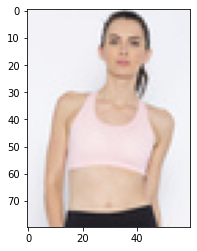

In [ ]:
# Formal/Formal Shoes has a mislabelled image
import matplotlib.pyplot as plt
from PIL import Image


matched_row = df.loc[df['id'] == (7217)]
print(matched_row)

img = Image.open('./Formal/Formal Shoes/7217.jpg')

plt.imshow(img)
plt.show()
